In [25]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

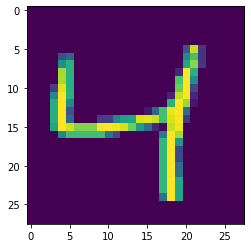

In [26]:
import matplotlib.pyplot as plt 
plt.imshow(X_train[2])

In [27]:
print(f"Number of training images {X_train.shape}")
print(f"Number of test images {X_test.shape}")

Number of training images (60000, 28, 28)
Number of test images (10000, 28, 28)


In [28]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
print(f"Number of training images {X_train.shape}")
print(f"Number of test images {X_test.shape}")

Number of training images (60000, 28, 28, 1)
Number of test images (10000, 28, 28, 1)


In [29]:
from tensorflow.keras.utils import to_categorical
print(f"Initial y_train[10] = {y_train[10]}")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f"Processed = {y_train[10]}")

Initial y_train[10] = 3
Processed = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
layer = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
model.add(layer)

layer = Conv2D(32, kernel_size=3, activation='relu')
model.add(layer)

layer = Flatten()
model.add(layer)

layer = Dense(10, activation='softmax')
model.add(layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2394 - accuracy: 0.9502 - val_loss: 0.0983 - val_accuracy: 0.9708
Epoch 2/3
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0704 - accuracy: 0.9791 - val_loss: 0.0758 - val_accuracy: 0.9769
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0928 - val_accuracy: 0.9720


In [41]:
import numpy as np
predictions = model.predict(X_test)
y_test_pred = []
for i in range(len(predictions)):
    pred_class = np.argmax(predictions[i])
    y_test_pred.append(pred_class)

y_test_class = []
for i in range(len(y_test)):
    pred_class = np.argmax(y_test[i])
    y_test_class.append(pred_class)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred=y_test_pred, y_true=y_test_class)
print(f"Accuracy on test set: {round(100 * acc, 2)}%")

Accuracy on test set: 97.2%


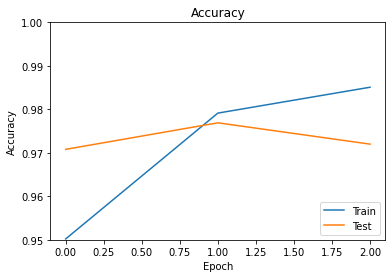

In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.ylim(0.95, 1)
plt.rcParams['figure.figsize'] = [30, 50]
plt.show()